In [1]:
from opensoundscape.preprocess.preprocessors import BasePreprocessor, AudioToSpectrogramPreprocessor, CnnPreprocessor
import torch
import pandas as pd
from pathlib import Path
import numpy as np
import pandas as pd
from opensoundscape.torch.models import cnn
from opensoundscape.torch.architectures import cnn_architectures

In [2]:
df = pd.read_csv('screaming_pyha_test.csv')
ef = pd.read_csv('flycatcher_test.csv')
ff = pd.read_csv('antbird_test.csv')
gf = pd.read_csv('attila_test.csv')
hf = pd.read_csv('peppershrike_test.csv')
print(df.shape)
print(ef.shape)
print(ff.shape)
print(gf.shape)
print(hf.shape)

(199, 6)
(1348, 6)
(1106, 6)
(163, 6)
(37, 6)


In [3]:
# df = df.append(ef, ignore_index=True)
# df = df.append(ff, ignore_index=True)
# df = df.append(gf, ignore_index=True)
# df = df.append(hf, ignore_index=True)
# df.shape
df = pd.read_csv('xeno_canto_test.csv')
ef = pd.read_csv('xeno_canto_test_data.csv')

In [4]:
# ff.drop('Unnamed: 0', inplace=True)
df.columns

Index(['Unnamed: 0', 'file', 'start_time', 'end_time', 'SAMPLING RATE',
       'MANUAL ID'],
      dtype='object')

In [5]:
df['MANUAL ID'].value_counts()

White-throated Toucan        3776
Red-eyed Vireo               1886
Eastern Kingbird             1403
White-bellied Tody-Tyrant    1018
Ihering's Antwren             295
Great-billed Hermit           237
Chivi Vireo                   234
Philadelphia Vireo             60
Scissor-tailed Flycatcher      58
Creamy-bellied Thrush          50
Black-and-white Warbler        50
Wood Thrush                    41
Yellow-throated Toucan         28
Brown Bullfinch                26
Noronha Vireo                  26
Bamboo Antshrike               19
Yellow-bellied Flycatcher      19
Long-billed Hermit             17
Water Rail                     15
Philippine Woodpecker          12
Yellow-green Vireo             11
Brown Violetear                11
Striated Antbird               11
Blue-backed Manakin            11
Channel-billed Toucan           9
Brown-headed Cowbird            8
White-throated Spadebill        8
Mountain Scops-Owl              6
White-browed Tapaculo           5
Name: MANUAL I

In [6]:
ef['MANUAL ID'].value_counts()

White-throated Toucan        107
Ihering's Antwren            102
Red-eyed Vireo                98
Brassy-breasted Tanager       91
Eastern Kingbird              85
White-bellied Tody-Tyrant     83
Charming Hummingbird          26
Bluish-slate Antshrike        25
Chivi Vireo                    4
Name: MANUAL ID, dtype: int64

In [7]:
df.loc[df['MANUAL ID'].str.contains('Toucan'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Toucan'), 'MANUAL ID'] = 'Toucan'
df.loc[df['MANUAL ID'].str.contains('Flycatcher'), 'MANUAL ID'] = 'Flycatcher'
df.loc[df['MANUAL ID'].str.contains('Thrush'), 'MANUAL ID'] = 'Thrush'
df.loc[df['MANUAL ID'].str.contains('Vireo'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Vireo'), 'MANUAL ID'] = 'Vireo'
df.loc[df['MANUAL ID'].str.contains('Antwren'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Antwren'), 'MANUAL ID'] = 'Antwren'
df.loc[df['MANUAL ID'].str.contains('Tanager'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Tanager'), 'MANUAL ID'] = 'Tanager'
df.loc[df['MANUAL ID'].str.contains('Kingbird'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Kingbird'), 'MANUAL ID'] = 'Kingbird'
df.loc[df['MANUAL ID'].str.contains('Tody-Tyrant'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Tody-Tyrant'), 'MANUAL ID'] = 'Tody-Tyrant'
df.loc[df['MANUAL ID'].str.contains('Hummingbird'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Hummingbird'), 'MANUAL ID'] = 'Hummingbird'
df.loc[df['MANUAL ID'].str.contains('Antshrike'), 'MANUAL ID'] = ef.loc[ef['MANUAL ID'].str.contains('Antshrike'), 'MANUAL ID'] = 'Antshrike'

classes = ['Antwren', 'Antshrike', 'Toucan', 'Vireo', 'Kingbird', 'Tody-Tyrant']
for i, row in df.iterrows():
    if(row['MANUAL ID'] not in classes):
        df.drop(i, inplace=True)
for i, row in ef.iterrows():
    if(row['MANUAL ID'] not in classes):
        ef.drop(i, inplace=True)
print(df['MANUAL ID'].value_counts())
print(ef['MANUAL ID'].value_counts())

Toucan         3813
Vireo          2217
Kingbird       1403
Tody-Tyrant    1018
Antwren         295
Antshrike        19
Name: MANUAL ID, dtype: int64
Toucan         107
Antwren        102
Vireo          102
Kingbird        85
Tody-Tyrant     83
Antshrike       25
Name: MANUAL ID, dtype: int64


In [8]:
from opensoundscape.annotations import categorical_to_one_hot
one_hot_labels, trainClasses = categorical_to_one_hot(df[['MANUAL ID']].values)
trainValDF = pd.DataFrame(index=df['file'],data=one_hot_labels,columns=trainClasses)

In [9]:
one_hot_labels, testClasses = categorical_to_one_hot(ef[['MANUAL ID']].values)
testDF = pd.DataFrame(index=ef['file'],data=one_hot_labels,columns=testClasses)

In [10]:
'''
    'Antwren', 'Antshrike', 'Toucan', 'Vireo', 'Kingbird', 'Tody-Tyrant'
'''

"\n    'Antwren', 'Antshrike', 'Toucan', 'Vireo', 'Kingbird', 'Tody-Tyrant'\n"

In [11]:
trainClasses

['Antwren', 'Kingbird', 'Vireo', 'Toucan', 'Tody-Tyrant', 'Antshrike']

In [12]:
testClasses

['Antwren', 'Kingbird', 'Vireo', 'Toucan', 'Tody-Tyrant', 'Antshrike']

In [13]:
# reference - http://opensoundscape.org/en/latest/api/modules.html?highlight=multiclass#opensoundscape.torch.models.cnn.Resnet18Multiclass

# http://opensoundscape.org/en/latest/api/modules.html?highlight=multiclass#opensoundscape.metrics.multiclass_metrics

In [14]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(trainValDF, test_size=0.2, random_state=42)
# train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [15]:
print(train_df.shape)
print(valid_df.shape)
print(testDF.shape)

(7012, 6)
(1753, 6)
(504, 6)


In [16]:
train_dataset = CnnPreprocessor(df=train_df)
train_dataset.augmentation_on()
train_dataset.actions.load_audio.set(sample_rate=44100)
valid_dataset = CnnPreprocessor(df=valid_df)
valid_dataset.augmentation_on()
valid_dataset.actions.load_audio.set(sample_rate=44100)

In [17]:
model = cnn.Resnet18Multiclass(trainClasses)

created PytorchModel model object with 6 classes


In [18]:
train_dataset.classes

Index(['Antwren', 'Kingbird', 'Vireo', 'Toucan', 'Tody-Tyrant', 'Antshrike'], dtype='object')

In [19]:
model.classes

['Antwren', 'Kingbird', 'Vireo', 'Toucan', 'Tody-Tyrant', 'Antshrike']

In [20]:
model.train(
    train_dataset=train_dataset,
    valid_dataset=valid_dataset,
    save_path='./multilabel_train_six_classes_xeno_canto/',
    epochs=10,
    batch_size=32,
    save_interval=100,
    num_workers=2
)

Epoch: 0 [batch 0/220 (0.00%)] 
	Jacc: 0.167 Hamm: 0.833 DistLoss: 30.906
Epoch: 0 [batch 10/220 (4.55%)] 
	Jacc: 0.172 Hamm: 0.115 DistLoss: 18.979


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 20/220 (9.09%)] 
	Jacc: 0.247 Hamm: 0.089 DistLoss: 15.861


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 30/220 (13.64%)] 
	Jacc: 0.331 Hamm: 0.078 DistLoss: 13.653


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 40/220 (18.18%)] 
	Jacc: 0.293 Hamm: 0.083 DistLoss: 11.784


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 50/220 (22.73%)] 
	Jacc: 0.504 Hamm: 0.021 DistLoss: 10.712


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 60/220 (27.27%)] 
	Jacc: 0.516 Hamm: 0.021 DistLoss: 9.718


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 70/220 (31.82%)] 
	Jacc: 0.399 Hamm: 0.057 DistLoss: 9.087


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 80/220 (36.36%)] 
	Jacc: 0.386 Hamm: 0.073 DistLoss: 8.631


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 90/220 (40.91%)] 
	Jacc: 0.464 Hamm: 0.052 DistLoss: 8.251


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 100/220 (45.45%)] 
	Jacc: 0.434 Hamm: 0.057 DistLoss: 7.920


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 110/220 (50.00%)] 
	Jacc: 0.514 Hamm: 0.042 DistLoss: 7.594


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 120/220 (54.55%)] 
	Jacc: 0.348 Hamm: 0.078 DistLoss: 7.410


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 130/220 (59.09%)] 
	Jacc: 0.428 Hamm: 0.036 DistLoss: 7.181


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 140/220 (63.64%)] 
	Jacc: 0.630 Hamm: 0.026 DistLoss: 6.940


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 150/220 (68.18%)] 
	Jacc: 0.493 Hamm: 0.047 DistLoss: 6.681


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 160/220 (72.73%)] 
	Jacc: 0.330 Hamm: 0.078 DistLoss: 6.534


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 170/220 (77.27%)] 
	Jacc: 0.532 Hamm: 0.036 DistLoss: 6.379


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 180/220 (81.82%)] 
	Jacc: 0.605 Hamm: 0.026 DistLoss: 6.238


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 190/220 (86.36%)] 
	Jacc: 0.503 Hamm: 0.042 DistLoss: 6.116


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 200/220 (90.91%)] 
	Jacc: 0.767 Hamm: 0.010 DistLoss: 5.977


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0 [batch 210/220 (95.45%)] 
	Jacc: 0.661 Hamm: 0.031 DistLoss: 5.862


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.7164040541104614
	 Recall: 0.6633310215116168
	 F1: 0.685897554718747
Updating best model
Epoch: 1 [batch 0/220 (0.00%)] 
	Jacc: 0.718 Hamm: 0.026 DistLoss: 3.208


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 10/220 (4.55%)] 
	Jacc: 0.731 Hamm: 0.016 DistLoss: 3.379


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 20/220 (9.09%)] 
	Jacc: 0.405 Hamm: 0.062 DistLoss: 3.617


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 30/220 (13.64%)] 
	Jacc: 0.577 Hamm: 0.031 DistLoss: 3.506


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 40/220 (18.18%)] 
	Jacc: 0.578 Hamm: 0.021 DistLoss: 3.331


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 50/220 (22.73%)] 
	Jacc: 0.767 Hamm: 0.010 DistLoss: 3.248


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 60/220 (27.27%)] 
	Jacc: 0.475 Hamm: 0.047 DistLoss: 3.183


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 70/220 (31.82%)] 
	Jacc: 0.726 Hamm: 0.026 DistLoss: 3.257


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 80/220 (36.36%)] 
	Jacc: 0.485 Hamm: 0.047 DistLoss: 3.293


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 90/220 (40.91%)] 
	Jacc: 0.533 Hamm: 0.036 DistLoss: 3.351


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 100/220 (45.45%)] 
	Jacc: 0.596 Hamm: 0.026 DistLoss: 3.351


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 110/220 (50.00%)] 
	Jacc: 0.681 Hamm: 0.021 DistLoss: 3.283


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 120/220 (54.55%)] 
	Jacc: 0.733 Hamm: 0.021 DistLoss: 3.199


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 130/220 (59.09%)] 
	Jacc: 0.776 Hamm: 0.021 DistLoss: 3.127


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 140/220 (63.64%)] 
	Jacc: 0.656 Hamm: 0.005 DistLoss: 3.026


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 150/220 (68.18%)] 
	Jacc: 0.590 Hamm: 0.021 DistLoss: 2.977


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 160/220 (72.73%)] 
	Jacc: 0.545 Hamm: 0.036 DistLoss: 2.955


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 170/220 (77.27%)] 
	Jacc: 0.726 Hamm: 0.016 DistLoss: 2.952


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 180/220 (81.82%)] 
	Jacc: 0.726 Hamm: 0.016 DistLoss: 2.948


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 190/220 (86.36%)] 
	Jacc: 0.713 Hamm: 0.031 DistLoss: 2.922


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 200/220 (90.91%)] 
	Jacc: 0.425 Hamm: 0.042 DistLoss: 2.932


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 1 [batch 210/220 (95.45%)] 
	Jacc: 0.710 Hamm: 0.031 DistLoss: 2.934


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.7846913341685807
	 Recall: 0.6685732295161367
	 F1: 0.7159304736852187
Updating best model
Epoch: 2 [batch 0/220 (0.00%)] 
	Jacc: 0.792 Hamm: 0.010 DistLoss: 1.440


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 10/220 (4.55%)] 
	Jacc: 0.637 Hamm: 0.016 DistLoss: 2.682


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 20/220 (9.09%)] 
	Jacc: 0.750 Hamm: 0.016 DistLoss: 2.451


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 30/220 (13.64%)] 
	Jacc: 0.653 Hamm: 0.031 DistLoss: 2.386


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 40/220 (18.18%)] 
	Jacc: 0.580 Hamm: 0.031 DistLoss: 2.296


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 50/220 (22.73%)] 
	Jacc: 0.634 Hamm: 0.010 DistLoss: 2.279


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 60/220 (27.27%)] 
	Jacc: 0.667 Hamm: 0.026 DistLoss: 2.207


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 70/220 (31.82%)] 
	Jacc: 0.739 Hamm: 0.021 DistLoss: 2.243


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 80/220 (36.36%)] 
	Jacc: 0.549 Hamm: 0.021 DistLoss: 2.277


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 90/220 (40.91%)] 
	Jacc: 0.710 Hamm: 0.021 DistLoss: 2.213


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 100/220 (45.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 2.248


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 110/220 (50.00%)] 
	Jacc: 0.501 Hamm: 0.042 DistLoss: 2.218


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 120/220 (54.55%)] 
	Jacc: 0.707 Hamm: 0.021 DistLoss: 2.238


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 130/220 (59.09%)] 
	Jacc: 0.768 Hamm: 0.021 DistLoss: 2.224


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 140/220 (63.64%)] 
	Jacc: 0.655 Hamm: 0.005 DistLoss: 2.210


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 150/220 (68.18%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 2.164


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 160/220 (72.73%)] 
	Jacc: 0.582 Hamm: 0.042 DistLoss: 2.157


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 170/220 (77.27%)] 
	Jacc: 0.647 Hamm: 0.026 DistLoss: 2.158
Epoch: 2 [batch 180/220 (81.82%)] 
	Jacc: 0.593 Hamm: 0.026 DistLoss: 2.128


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 190/220 (86.36%)] 
	Jacc: 0.719 Hamm: 0.026 DistLoss: 2.143


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 200/220 (90.91%)] 
	Jacc: 0.698 Hamm: 0.026 DistLoss: 2.153


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 2 [batch 210/220 (95.45%)] 
	Jacc: 0.750 Hamm: 0.010 DistLoss: 2.146


/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.7835088271381259
	 Recall: 0.6993281588407864
	 F1: 0.7343672237210792
Updating best model
Epoch: 3 [batch 0/220 (0.00%)] 
	Jacc: 0.459 Hamm: 0.026 DistLoss: 2.805


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 10/220 (4.55%)] 
	Jacc: 0.652 Hamm: 0.010 DistLoss: 2.953


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 20/220 (9.09%)] 
	Jacc: 0.531 Hamm: 0.036 DistLoss: 2.933


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 30/220 (13.64%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 2.875


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 40/220 (18.18%)] 
	Jacc: 0.608 Hamm: 0.016 DistLoss: 2.788


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 50/220 (22.73%)] 
	Jacc: 0.705 Hamm: 0.021 DistLoss: 2.718


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 60/220 (27.27%)] 
	Jacc: 0.678 Hamm: 0.021 DistLoss: 2.615


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 70/220 (31.82%)] 
	Jacc: 0.792 Hamm: 0.005 DistLoss: 2.480


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 80/220 (36.36%)] 
	Jacc: 0.510 Hamm: 0.036 DistLoss: 2.445


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 90/220 (40.91%)] 
	Jacc: 0.743 Hamm: 0.016 DistLoss: 2.393


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 100/220 (45.45%)] 
	Jacc: 0.821 Hamm: 0.005 DistLoss: 2.381


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 110/220 (50.00%)] 
	Jacc: 0.609 Hamm: 0.016 DistLoss: 2.336


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 120/220 (54.55%)] 
	Jacc: 0.748 Hamm: 0.021 DistLoss: 2.241


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 130/220 (59.09%)] 
	Jacc: 0.747 Hamm: 0.021 DistLoss: 2.213


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 140/220 (63.64%)] 
	Jacc: 0.730 Hamm: 0.021 DistLoss: 2.193


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 150/220 (68.18%)] 
	Jacc: 0.571 Hamm: 0.026 DistLoss: 2.174


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 160/220 (72.73%)] 
	Jacc: 0.674 Hamm: 0.036 DistLoss: 2.180


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 170/220 (77.27%)] 
	Jacc: 0.601 Hamm: 0.021 DistLoss: 2.175


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 180/220 (81.82%)] 
	Jacc: 0.722 Hamm: 0.016 DistLoss: 2.175
Epoch: 3 [batch 190/220 (86.36%)] 
	Jacc: 0.637 Hamm: 0.031 DistLoss: 2.181


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 200/220 (90.91%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 2.152


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 3 [batch 210/220 (95.45%)] 
	Jacc: 0.619 Hamm: 0.010 DistLoss: 2.120


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.7657299815299591
	 Recall: 0.7112996184824961
	 F1: 0.7318029925380934
Epoch: 4 [batch 0/220 (0.00%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.377


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 10/220 (4.55%)] 
	Jacc: 0.758 Hamm: 0.021 DistLoss: 1.508


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 20/220 (9.09%)] 
	Jacc: 0.792 Hamm: 0.005 DistLoss: 1.684


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 30/220 (13.64%)] 
	Jacc: 0.616 Hamm: 0.010 DistLoss: 1.778


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 40/220 (18.18%)] 
	Jacc: 0.618 Hamm: 0.010 DistLoss: 1.633


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 50/220 (22.73%)] 
	Jacc: 0.633 Hamm: 0.021 DistLoss: 1.677


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 60/220 (27.27%)] 
	Jacc: 0.805 Hamm: 0.010 DistLoss: 1.722


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 70/220 (31.82%)] 
	Jacc: 0.694 Hamm: 0.010 DistLoss: 1.759


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 80/220 (36.36%)] 
	Jacc: 0.722 Hamm: 0.031 DistLoss: 1.816
Epoch: 4 [batch 90/220 (40.91%)] 
	Jacc: 0.641 Hamm: 0.010 DistLoss: 1.749


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 100/220 (45.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.735


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 110/220 (50.00%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.771


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 120/220 (54.55%)] 
	Jacc: 0.792 Hamm: 0.005 DistLoss: 1.713


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 130/220 (59.09%)] 
	Jacc: 0.614 Hamm: 0.010 DistLoss: 1.748


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 140/220 (63.64%)] 
	Jacc: 0.730 Hamm: 0.021 DistLoss: 1.755


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 150/220 (68.18%)] 
	Jacc: 0.743 Hamm: 0.016 DistLoss: 1.778


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 160/220 (72.73%)] 
	Jacc: 0.634 Hamm: 0.016 DistLoss: 1.783


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 170/220 (77.27%)] 
	Jacc: 0.765 Hamm: 0.010 DistLoss: 1.776


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 180/220 (81.82%)] 
	Jacc: 0.630 Hamm: 0.031 DistLoss: 1.759


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 190/220 (86.36%)] 
	Jacc: 0.653 Hamm: 0.010 DistLoss: 1.769


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 200/220 (90.91%)] 
	Jacc: 0.768 Hamm: 0.010 DistLoss: 1.778


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 4 [batch 210/220 (95.45%)] 
	Jacc: 0.681 Hamm: 0.021 DistLoss: 1.761


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.7840511769313202
	 Recall: 0.7671950728269596
	 F1: 0.774565508641904
Updating best model
Epoch: 5 [batch 0/220 (0.00%)] 
	Jacc: 0.633 Hamm: 0.005 DistLoss: 0.795


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 10/220 (4.55%)] 
	Jacc: 0.740 Hamm: 0.010 DistLoss: 1.014


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 20/220 (9.09%)] 
	Jacc: 0.643 Hamm: 0.016 DistLoss: 1.157
Epoch: 5 [batch 30/220 (13.64%)] 
	Jacc: 0.653 Hamm: 0.005 DistLoss: 1.180


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 40/220 (18.18%)] 
	Jacc: 0.724 Hamm: 0.021 DistLoss: 1.188


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 50/220 (22.73%)] 
	Jacc: 0.595 Hamm: 0.021 DistLoss: 1.188


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 60/220 (27.27%)] 
	Jacc: 0.772 Hamm: 0.016 DistLoss: 1.178


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 70/220 (31.82%)] 
	Jacc: 0.821 Hamm: 0.005 DistLoss: 1.164


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 80/220 (36.36%)] 
	Jacc: 0.639 Hamm: 0.005 DistLoss: 1.155


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 90/220 (40.91%)] 
	Jacc: 0.667 Hamm: 0.010 DistLoss: 1.159
Epoch: 5 [batch 100/220 (45.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.117


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 110/220 (50.00%)] 
	Jacc: 0.646 Hamm: 0.010 DistLoss: 1.166


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 120/220 (54.55%)] 
	Jacc: 0.578 Hamm: 0.016 DistLoss: 1.169


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 130/220 (59.09%)] 
	Jacc: 0.572 Hamm: 0.026 DistLoss: 1.186


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 140/220 (63.64%)] 
	Jacc: 0.792 Hamm: 0.010 DistLoss: 1.178


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 150/220 (68.18%)] 
	Jacc: 0.810 Hamm: 0.005 DistLoss: 1.246


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 160/220 (72.73%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.259


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 170/220 (77.27%)] 
	Jacc: 0.602 Hamm: 0.016 DistLoss: 1.290


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 180/220 (81.82%)] 
	Jacc: 0.817 Hamm: 0.005 DistLoss: 1.309


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 190/220 (86.36%)] 
	Jacc: 0.809 Hamm: 0.021 DistLoss: 1.329
Epoch: 5 [batch 200/220 (90.91%)] 
	Jacc: 0.702 Hamm: 0.016 DistLoss: 1.352


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 5 [batch 210/220 (95.45%)] 
	Jacc: 0.800 Hamm: 0.005 DistLoss: 1.354


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.9735677228414062
	 Recall: 0.8590877355706713
	 F1: 0.9068488854099587
Updating best model
Epoch: 6 [batch 0/220 (0.00%)] 
	Jacc: 0.582 Hamm: 0.031 DistLoss: 3.510


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 10/220 (4.55%)] 
	Jacc: 0.567 Hamm: 0.016 DistLoss: 1.290


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 20/220 (9.09%)] 
	Jacc: 0.500 Hamm: 0.005 DistLoss: 1.250


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 30/220 (13.64%)] 
	Jacc: 0.792 Hamm: 0.005 DistLoss: 1.136


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 40/220 (18.18%)] 
	Jacc: 0.574 Hamm: 0.021 DistLoss: 1.177


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 50/220 (22.73%)] 
	Jacc: 0.991 Hamm: 0.005 DistLoss: 1.226
Epoch: 6 [batch 60/220 (27.27%)] 
	Jacc: 0.503 Hamm: 0.031 DistLoss: 1.228


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 70/220 (31.82%)] 
	Jacc: 0.806 Hamm: 0.005 DistLoss: 1.215


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 80/220 (36.36%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.197


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 90/220 (40.91%)] 
	Jacc: 0.650 Hamm: 0.021 DistLoss: 1.224


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 100/220 (45.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.269


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 110/220 (50.00%)] 
	Jacc: 0.656 Hamm: 0.010 DistLoss: 1.275


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 120/220 (54.55%)] 
	Jacc: 0.748 Hamm: 0.016 DistLoss: 1.280


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 130/220 (59.09%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.286


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 140/220 (63.64%)] 
	Jacc: 0.583 Hamm: 0.026 DistLoss: 1.301


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 150/220 (68.18%)] 
	Jacc: 0.609 Hamm: 0.036 DistLoss: 1.335


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 160/220 (72.73%)] 
	Jacc: 0.631 Hamm: 0.010 DistLoss: 1.344


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 170/220 (77.27%)] 
	Jacc: 0.625 Hamm: 0.005 DistLoss: 1.325


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 180/220 (81.82%)] 
	Jacc: 0.657 Hamm: 0.010 DistLoss: 1.324


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 190/220 (86.36%)] 
	Jacc: 0.750 Hamm: 0.005 DistLoss: 1.310


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 200/220 (90.91%)] 
	Jacc: 0.812 Hamm: 0.005 DistLoss: 1.304


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 6 [batch 210/220 (95.45%)] 
	Jacc: 0.791 Hamm: 0.010 DistLoss: 1.321


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.9479833929572411
	 Recall: 0.9308531354840165
	 F1: 0.9384208077275925
Updating best model
Epoch: 7 [batch 0/220 (0.00%)] 
	Jacc: 0.656 Hamm: 0.010 DistLoss: 1.613


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 10/220 (4.55%)] 
	Jacc: 0.567 Hamm: 0.026 DistLoss: 2.690


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 20/220 (9.09%)] 
	Jacc: 0.523 Hamm: 0.042 DistLoss: 2.377


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 30/220 (13.64%)] 
	Jacc: 0.733 Hamm: 0.026 DistLoss: 2.393


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 40/220 (18.18%)] 
	Jacc: 0.796 Hamm: 0.010 DistLoss: 2.136


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 50/220 (22.73%)] 
	Jacc: 0.677 Hamm: 0.042 DistLoss: 2.020


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 60/220 (27.27%)] 
	Jacc: 0.667 Hamm: 0.010 DistLoss: 1.891
Epoch: 7 [batch 70/220 (31.82%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.787


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 80/220 (36.36%)] 
	Jacc: 0.818 Hamm: 0.005 DistLoss: 1.710


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 90/220 (40.91%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.630


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 100/220 (45.45%)] 
	Jacc: 0.591 Hamm: 0.016 DistLoss: 1.570


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 110/220 (50.00%)] 
	Jacc: 0.766 Hamm: 0.010 DistLoss: 1.565


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 120/220 (54.55%)] 
	Jacc: 0.600 Hamm: 0.021 DistLoss: 1.557


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 130/220 (59.09%)] 
	Jacc: 0.916 Hamm: 0.016 DistLoss: 1.544
Epoch: 7 [batch 140/220 (63.64%)] 
	Jacc: 0.701 Hamm: 0.031 DistLoss: 1.517


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 150/220 (68.18%)] 
	Jacc: 0.516 Hamm: 0.026 DistLoss: 1.520


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 160/220 (72.73%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.481


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 170/220 (77.27%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.455


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 180/220 (81.82%)] 
	Jacc: 0.687 Hamm: 0.031 DistLoss: 1.455


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 190/220 (86.36%)] 
	Jacc: 0.729 Hamm: 0.031 DistLoss: 1.440


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 200/220 (90.91%)] 
	Jacc: 0.622 Hamm: 0.016 DistLoss: 1.448


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 7 [batch 210/220 (95.45%)] 
	Jacc: 0.698 Hamm: 0.026 DistLoss: 1.443


/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.9116021559877034
	 Recall: 0.8740710607512295
	 F1: 0.8908795381991682
Epoch: 8 [batch 0/220 (0.00%)] 
	Jacc: 0.746 Hamm: 0.016 DistLoss: 1.360


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 10/220 (4.55%)] 
	Jacc: 0.693 Hamm: 0.026 DistLoss: 0.992


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 20/220 (9.09%)] 
	Jacc: 0.967 Hamm: 0.005 DistLoss: 1.223
Epoch: 8 [batch 30/220 (13.64%)] 
	Jacc: 0.625 Hamm: 0.005 DistLoss: 1.140


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 40/220 (18.18%)] 
	Jacc: 0.803 Hamm: 0.010 DistLoss: 1.181


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 50/220 (22.73%)] 
	Jacc: 0.586 Hamm: 0.016 DistLoss: 1.216


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 60/220 (27.27%)] 
	Jacc: 0.618 Hamm: 0.016 DistLoss: 1.291


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 70/220 (31.82%)] 
	Jacc: 0.615 Hamm: 0.010 DistLoss: 1.225


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 80/220 (36.36%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.228


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 90/220 (40.91%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.195


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 100/220 (45.45%)] 
	Jacc: 0.639 Hamm: 0.005 DistLoss: 1.164


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 110/220 (50.00%)] 
	Jacc: 0.657 Hamm: 0.005 DistLoss: 1.169


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 120/220 (54.55%)] 
	Jacc: 0.750 Hamm: 0.005 DistLoss: 1.184


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 130/220 (59.09%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.189


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 140/220 (63.64%)] 
	Jacc: 0.716 Hamm: 0.036 DistLoss: 1.170
Epoch: 8 [batch 150/220 (68.18%)] 
	Jacc: 0.781 Hamm: 0.010 DistLoss: 1.140


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 160/220 (72.73%)] 
	Jacc: 0.810 Hamm: 0.005 DistLoss: 1.117


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 170/220 (77.27%)] 
	Jacc: 0.590 Hamm: 0.010 DistLoss: 1.107


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 180/220 (81.82%)] 
	Jacc: 0.818 Hamm: 0.005 DistLoss: 1.088


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 190/220 (86.36%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.087


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 200/220 (90.91%)] 
	Jacc: 0.623 Hamm: 0.010 DistLoss: 1.096


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 8 [batch 210/220 (95.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.119


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.9697195849902229
	 Recall: 0.9514953474592289
	 F1: 0.9601924715383648
Updating best model
Epoch: 9 [batch 0/220 (0.00%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.211


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 10/220 (4.55%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 0.542


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 20/220 (9.09%)] 
	Jacc: 0.542 Hamm: 0.026 DistLoss: 0.986


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 30/220 (13.64%)] 
	Jacc: 0.768 Hamm: 0.010 DistLoss: 0.929


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 40/220 (18.18%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 0.938


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 50/220 (22.73%)] 
	Jacc: 0.615 Hamm: 0.016 DistLoss: 1.039


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 60/220 (27.27%)] 
	Jacc: 0.548 Hamm: 0.036 DistLoss: 1.071


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 70/220 (31.82%)] 
	Jacc: 0.540 Hamm: 0.026 DistLoss: 1.085


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 80/220 (36.36%)] 
	Jacc: 0.643 Hamm: 0.005 DistLoss: 1.060


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 90/220 (40.91%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.040


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 100/220 (45.45%)] 
	Jacc: 0.755 Hamm: 0.016 DistLoss: 1.050


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 110/220 (50.00%)] 
	Jacc: 0.594 Hamm: 0.021 DistLoss: 1.063


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 120/220 (54.55%)] 
	Jacc: 0.762 Hamm: 0.021 DistLoss: 1.113


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 130/220 (59.09%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.098


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 140/220 (63.64%)] 
	Jacc: 0.694 Hamm: 0.021 DistLoss: 1.161


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 150/220 (68.18%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.145


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 160/220 (72.73%)] 
	Jacc: 0.833 Hamm: 0.005 DistLoss: 1.172
Epoch: 9 [batch 170/220 (77.27%)] 
	Jacc: 0.735 Hamm: 0.021 DistLoss: 1.153


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 180/220 (81.82%)] 
	Jacc: 0.611 Hamm: 0.005 DistLoss: 1.173


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 190/220 (86.36%)] 
	Jacc: 0.667 Hamm: 0.000 DistLoss: 1.165


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 200/220 (90.91%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.155


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 9 [batch 210/220 (95.45%)] 
	Jacc: 0.833 Hamm: 0.000 DistLoss: 1.132


/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kushagraagrawal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1961: UserWarning: nperseg = 512 is greater than input length  = 468, using nperseg = 468
  warnings.warn('nperseg = {0:d} is greater than input length '



Validation.
(1753, 6)
	 Precision: 0.847116325077221
	 Recall: 0.947406306779595
	 F1: 0.869193417385664
Saving weights, metrics, and train/valid scores.

Best Model Appears at Epoch 8 with F1 0.960.


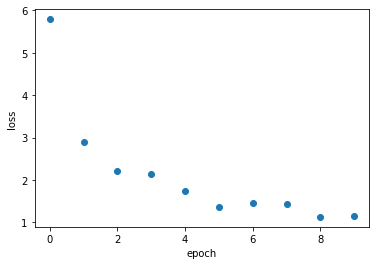

In [21]:
import matplotlib.pyplot as plt
plt.scatter(model.loss_hist.keys(),model.loss_hist.values())
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
from opensoundscape.torch.models.cnn import load_model
model = load_model('./multilabel_train_six_classes_xeno_canto/best.model')

In [23]:
prediction_dataset = model.train_dataset.sample(n=0)
prediction_dataset.augmentation_off()
prediction_dataset.df = testDF

In [24]:
valid_scores_df, valid_preds_df, valid_labels_df = model.predict(prediction_dataset,
                                                                 binary_preds='single_target',
                                                                 batch_size=16,
                                                                 num_workers=2,
                                                                 activation_layer='softmax')

(504, 6)


In [25]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
print(classification_report(valid_labels_df, valid_preds_df))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       102
           1       0.98      0.96      0.97        85
           2       1.00      0.97      0.99       102
           3       0.89      0.99      0.94       107
           4       0.94      0.90      0.92        83
           5       0.00      0.00      0.00        25

   micro avg       0.91      0.91      0.91       504
   macro avg       0.76      0.79      0.78       504
weighted avg       0.87      0.91      0.89       504
 samples avg       0.91      0.91      0.91       504



/Users/kushagraagrawal/anaconda3/envs/opso/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
testDF.columns

Index(['Antwren', 'Kingbird', 'Vireo', 'Toucan', 'Tody-Tyrant', 'Antshrike'], dtype='object')

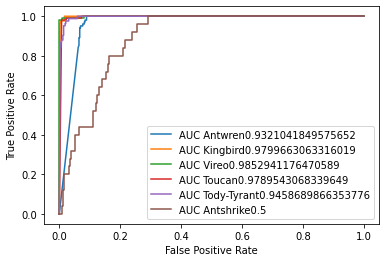

In [27]:
'''
    Toucan                       3813
Vireo                        2217
Eastern Kingbird             1403
White-bellied Tody-Tyrant    1018
'''
fpr, tpr, thresh = roc_curve(valid_labels_df['Antwren'],  valid_scores_df['Antwren'])
auc = roc_auc_score(valid_labels_df['Antwren'],  valid_preds_df['Antwren'])

fpr2, tpr2, thresh2 = roc_curve(valid_labels_df['Kingbird'],  valid_scores_df['Kingbird'])
auc2 = roc_auc_score(valid_labels_df['Kingbird'],  valid_preds_df['Kingbird'])

fpr3, tpr3, thresh3 = roc_curve(valid_labels_df['Vireo'],  valid_scores_df['Vireo'])
auc3 = roc_auc_score(valid_labels_df['Vireo'],  valid_preds_df['Vireo'])

fpr4, tpr4, thresh4 = roc_curve(valid_labels_df['Toucan'],  valid_scores_df['Toucan'])
auc4 = roc_auc_score(valid_labels_df['Toucan'],  valid_preds_df['Toucan'])

fpr5, tpr5, thresh5 = roc_curve(valid_labels_df['Tody-Tyrant'],  valid_scores_df['Tody-Tyrant'])
auc5 = roc_auc_score(valid_labels_df['Tody-Tyrant'],  valid_preds_df['Tody-Tyrant'])

fpr6, tpr6, thresh6 = roc_curve(valid_labels_df['Antshrike'],  valid_scores_df['Antshrike'])
auc6 = roc_auc_score(valid_labels_df['Antshrike'],  valid_preds_df['Antshrike'])

plt.plot(fpr,tpr,label="AUC Antwren"+str(auc))
plt.plot(fpr2,tpr2,label="AUC Kingbird"+str(auc2))
plt.plot(fpr3,tpr3,label="AUC Vireo"+str(auc3))
plt.plot(fpr4,tpr4,label="AUC Toucan"+str(auc4))
plt.plot(fpr5,tpr5,label="AUC Tody-Tyrant"+str(auc5))
plt.plot(fpr6,tpr6,label="AUC Antshrike"+str(auc6))
# plt.title('Prediction on peru dataset (Train: microfaune)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()